changed to markdown so that this code isn't run
from qsurface.main import initialize, run
%matplotlib tk

code, decoder = initialize((6,6), "planar", "mwpm", enabled_errors=["pauli"], faulty_measurements=True, plotting=True, initial_states=(0,0))
run(code, decoder, iteration=10, error_rates = {"p_bitflip": 0.05, "p_bitflip_plaq": 0.05}, decode_initial=False)

changed to markdown
from qsurface.main import initialize, run
code, decoder = initialize((6,6), "toric", "mwpm", enabled_errors=["pauli"])
run(code, decoder, iterations=10, error_rates = {"p_bitflip": 0.1})

Notes for self:


In [1]:
from qsurface.errors.pauli import Sim as PauliSim
from qsurface.codes.elements import DataQubit
from qsurface.codes.elements import AncillaQubit
from qsurface.codes.elements import Edge
from qsurface.main import initialize

In [2]:
error = PauliSim(p_bitflip = 0.05)

In [3]:
dqubit = DataQubit((0,0))

In [4]:
ancilla_a = AncillaQubit((0,0.5), state_type = "x")
ancilla_b = AncillaQubit((-0.5,0), state_type = "z")
ancilla_c = AncillaQubit((0.5,0), state_type = "z")
ancilla_d = AncillaQubit((0,-0.5), state_type = "x")

In [5]:
# see entangle_pair under qsurface.codes._template

ancilla_a.parity_qubits[(0,0)] = dqubit
ancilla_b.parity_qubits[(0,0)] = dqubit
ancilla_c.parity_qubits[(0,0)] = dqubit
ancilla_d.parity_qubits[(0,0)] = dqubit

x_edge = Edge(dqubit, state_type="x", initial_state=False)
z_edge = Edge(dqubit, state_type="z", initial_state=False)

dqubit.edges["x"] = x_edge
dqubit.edges["z"] = z_edge

x_edge.add_node(ancilla_a)
x_edge.add_node(ancilla_d)
z_edge.add_node(ancilla_b)
z_edge.add_node(ancilla_c)

In [6]:
dqubit.state

{'x': False, 'z': False}

In [7]:
error.random_error(dqubit, p_bitflip=0, p_phaseflip=1)

In [8]:
dqubit.state

{'x': False, 'z': True}

In [9]:
ancilla_a.measure()
ancilla_b.measure()
ancilla_c.measure()
ancilla_d.measure()

False

In [10]:
ancilla_a.syndrome

False

In [11]:
ancilla_d.syndrome

False

In [12]:
ancilla_b.syndrome

True

In [13]:
ancilla_c.syndrome

True

Drawing 1/1: Initial


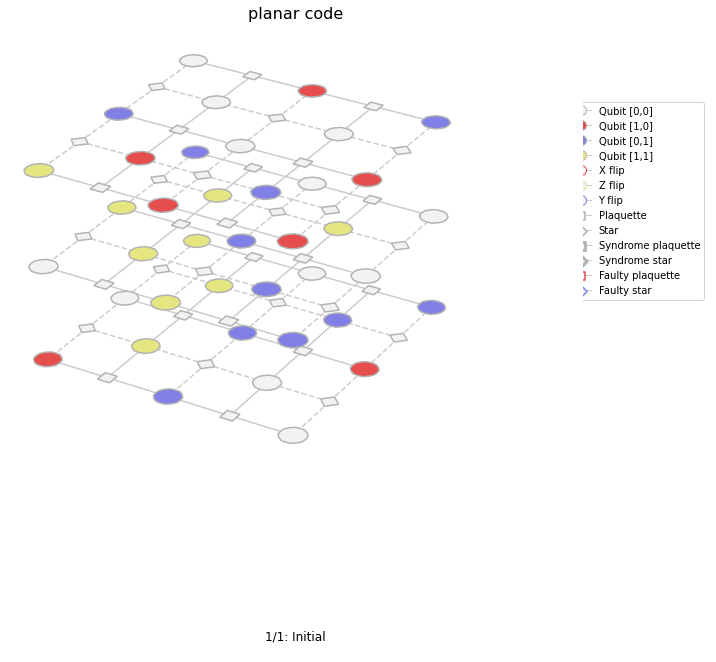

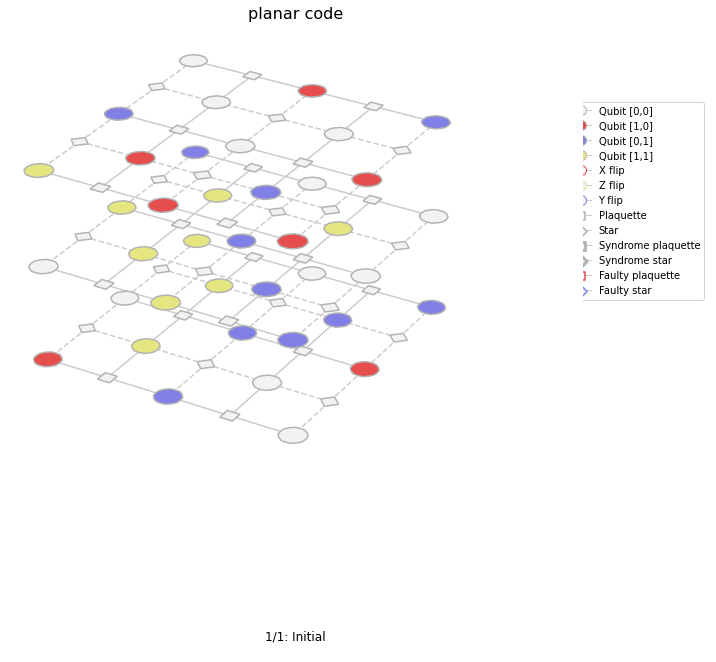

In [6]:
code, decoder = initialize((3,3), "planar", "mwpm", enabled_errors=["pauli"], plotting=True, faulty_measurements=True)

In [63]:
code.logical_state

{'x': 1, 'z': 1}

In [3]:
# with some adjustments, this could be changed to applying random errors
def apply_surface_error(code, errors, z=0):
    # errors is a dictionary with the qubit position as key and error type as value
    # currently supported errors are Pauli (I, X, Y, or Z)
    for qubit_pos in errors.keys():
        if errors[qubit_pos] == 'X':
            code.errors['pauli'].bitflip(code.data_qubits[z][qubit_pos])
        elif errors[qubit_pos] == 'Z':
            code.errors['pauli'].phaseflip(code.data_qubits[z][qubit_pos])
        elif errors[qubit_pos] == 'Y':
            code.errors['pauli'].bitphaseflip(code.data_qubits[z][qubit_pos])

In [15]:
error_dict = {(1.5, 1): 'X'} # logical operators are only bottom and left ones

In [16]:
apply_surface_error(code, error_dict)

In [34]:
code.ancilla_qubits[0][(1, 1)].syndrome

False

Drawing 2/2: Test 1


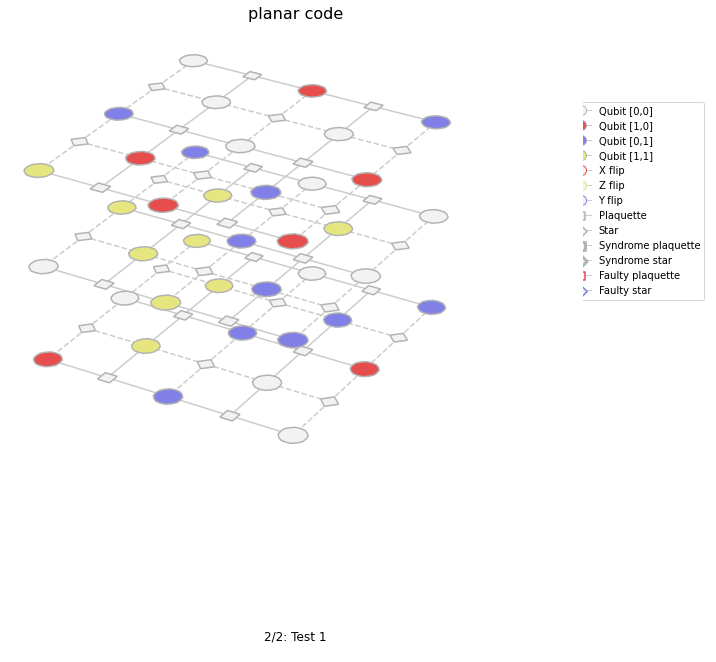

In [7]:
code.figure.draw_figure(new_iter_name="Test 1")

In [4]:
def get_syndromes(code, z=0):
    # x ancilla are on whole number coordinates (n, m)
    # z ancilla are on half integer coordinates (n.5, m.5)

    for ancilla in code.ancilla_qubits[z].values():
        ancilla.measure()
    
    coordinates = sorted(code.ancilla_qubits[z].keys())
    x_ancilla=[]
    z_ancilla=[]
    
    for coord in coordinates:
        if coord[1] % 1: # False if whole integer, True if half integer
            z_ancilla.append(code.ancilla_qubits[z][coord])
        else:
            x_ancilla.append(code.ancilla_qubits[z][coord])
    
    x_str = ""
    z_str = ""
    
    for x in x_ancilla:
        if x.syndrome:
            x_str += "1"
        else:
            x_str += "0"
    for z in z_ancilla:
        if z.syndrome:
            z_str += "1"
        else:
            z_str += "0"
    return x_str, z_str

In [4]:
def tanner(code):
    x_syn, z_syn = get_syndromes(code, z=0)
    return

In [5]:
get_syndromes(code)

('001010', '111011')

In [9]:
get_syndromes(code)

('101010', '111011')

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
G = nx.Graph()

In [6]:
G.add_node(code.ancilla_qubits[0][0.5, 0.5])
G.add_node(code.ancilla_qubits[0][1.5, 0.5])

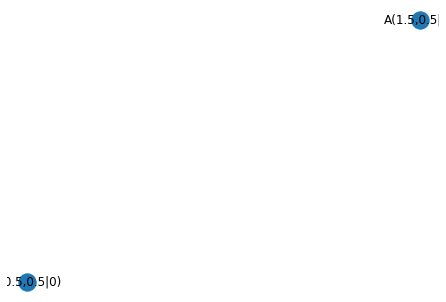

In [7]:
nx.draw(G, with_labels=True)

In [8]:
G.add_edge(code.ancilla_qubits[0][0.5, 0.5], code.ancilla_qubits[0][1.5, 0.5], weight=0.5)

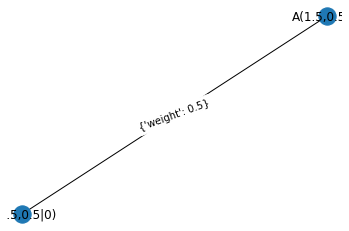

In [9]:
pos = nx.spring_layout(G)
nx.draw_networkx_edge_labels(G, pos)
nx.draw(G, with_labels=True)

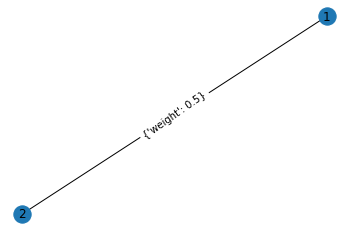

In [10]:
H = nx.convert_node_labels_to_integers(G, first_label = 1)
pos = nx.spring_layout(H)
nx.draw_networkx_edge_labels(H, pos)
nx.draw(H, with_labels=True)

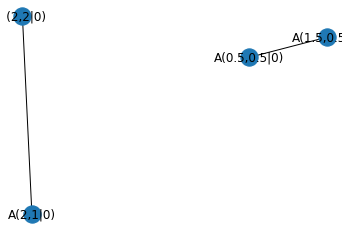

In [11]:
K = G.copy()
K.add_nodes_from([code.ancilla_qubits[0][2, 1], code.ancilla_qubits[0][2, 2]])
K.add_edge(code.ancilla_qubits[0][2, 1], code.ancilla_qubits[0][2, 2], weight=0.3)

pos = nx.spring_layout(K)
nx.draw_networkx_edge_labels(K, pos)
nx.draw(K, with_labels=True)

In [19]:
K.edges[(code.ancilla_qubits[0][2, 1], code.ancilla_qubits[0][2, 2])]['weight']

0.3

In [14]:
def get_detections(code):
    size = code.size[0]
    coords = sorted(code.ancilla_qubits[0].keys())
    x_detections = []
    z_detections = []
    
    for z in range(code.layers):
        sorted_x = [code.ancilla_qubits[z][coord] for coord in coords if not(coord[1] % 1)]
        sorted_z = [code.ancilla_qubits[z][coord] for coord in coords if coord[1] % 1]
        layer_x_detections = []
        layer_z_detections = []

        for i in range(2*size):
            if sorted_x[i].syndrome:
                layer_x_detections.append(sorted_x[i])

            if sorted_z[i].syndrome:
                layer_z_detections.append(sorted_z[i])
        
        x_detections.append(layer_x_detections)
        z_detections.append(layer_z_detections)
    
    return x_detections, z_detections

In [41]:
def decoder_graph(detection):
    G = nx.Graph()
    for layer in range(len(detection)):
        for ancilla in detection[layer]:
            G.add_node(ancilla, z=layer)
            
    return G

Drawing 39/39: Layer 0: errors applied


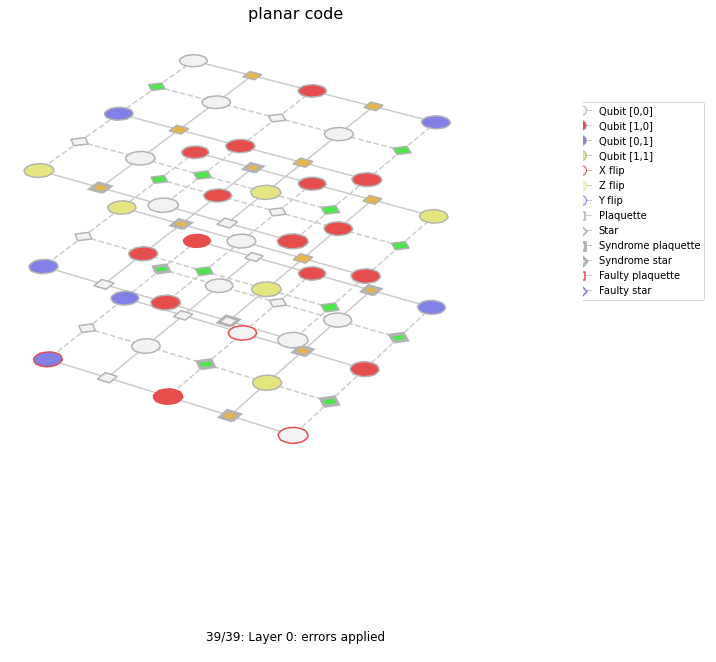

Drawing 40/40: Layer 0: ancilla-qubits measured


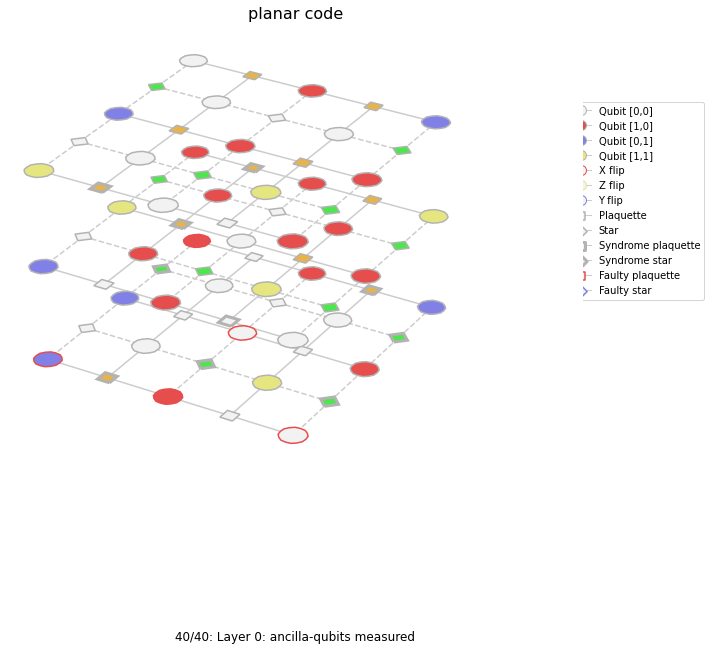

Drawing 41/41: Layer 1: errors applied


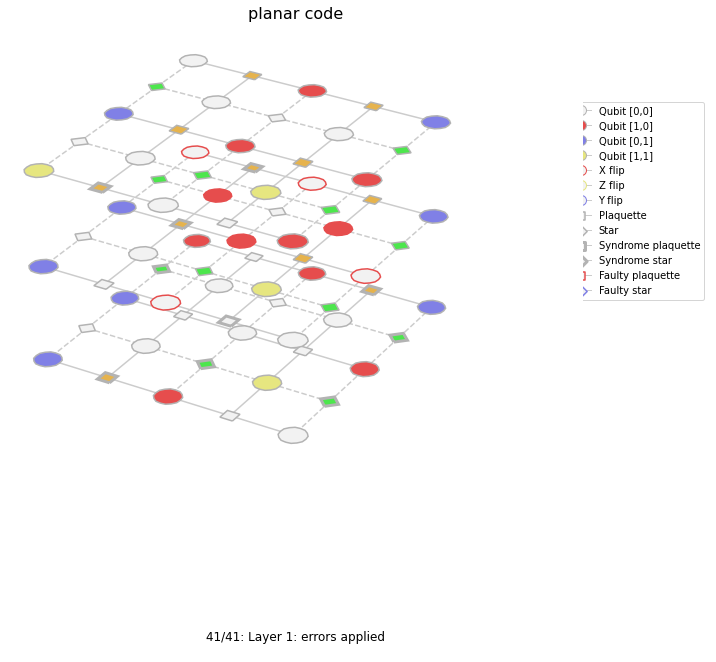

Drawing 42/42: Layer 1: ancilla-qubits measured


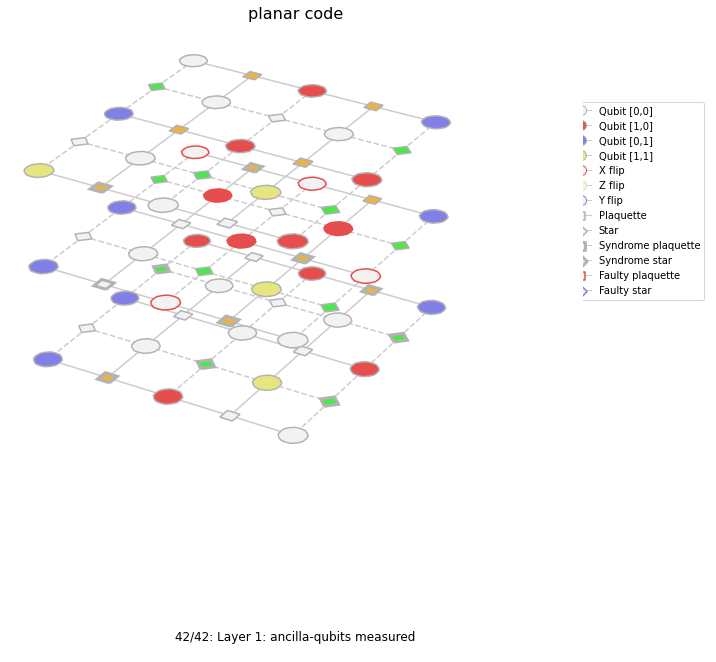

Drawing 43/43: Layer 2: errors applied


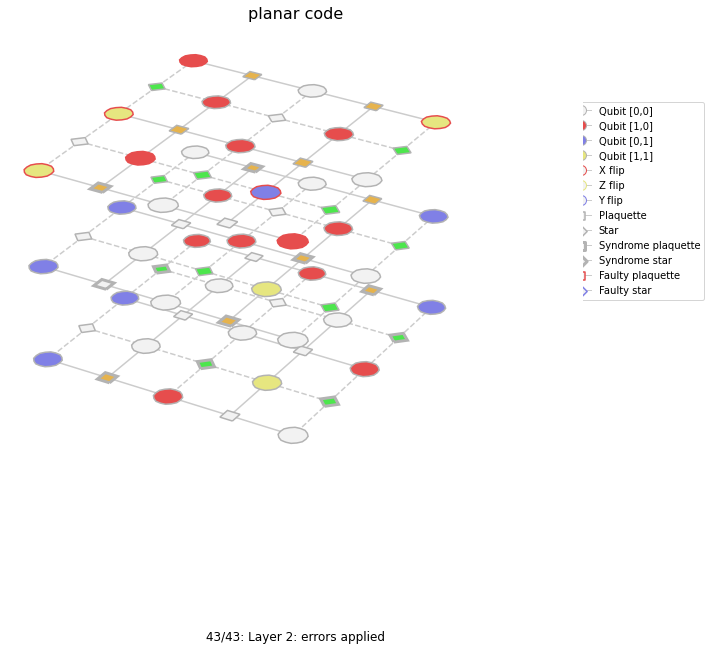

Drawing 44/44: Layer 2: ancilla-qubits measured


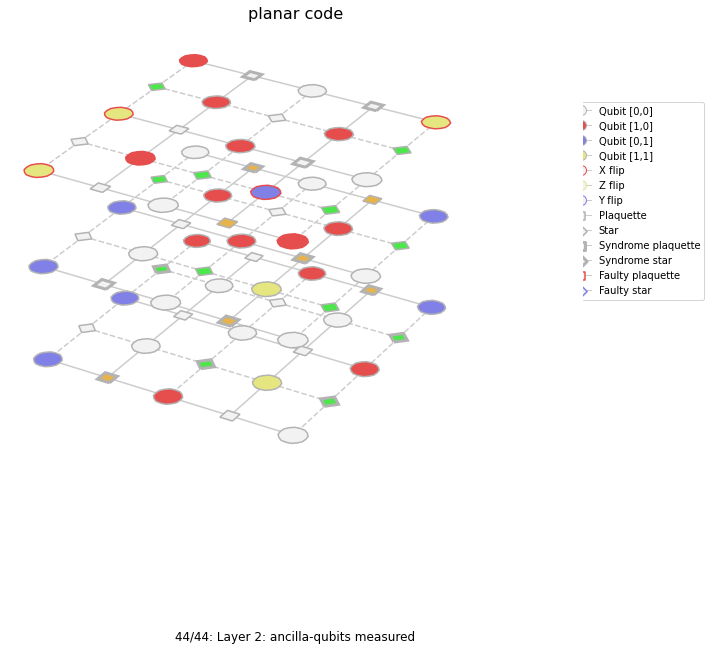

In [42]:
code.random_errors(p_bitflip = 0.5)

In [43]:
x_detections, z_detections = get_detections(code)

In [44]:
x_graph = decoder_graph(x_detections)
z_graph = decoder_graph(z_detections)

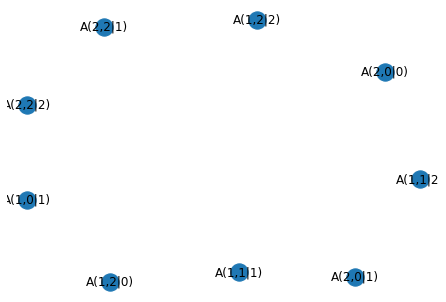

In [47]:
nx.draw(x_graph, with_labels=True)